In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df= pd.concat ([

    pd.read_csv('Youtube01-Psy.csv'),
    pd.read_csv('Youtube02-KatyPerry.csv'),
    pd.read_csv('Youtube03-LMFAO.csv'),
    pd.read_csv('Youtube04-Eminem.csv'),
    pd.read_csv('Youtube05-Shakira.csv')
])



df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [ ]:
df.CONTENT.iloc[4]

'watch?v=vtaRGgvGtWQ   Check this out .\ufeff'

In [ ]:
from pandas.core.base import value_counts
df.CLASS.value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [ ]:
# Train /Test split
from sklearn.model_selection import train_test_split
seed=123
x_train,x_test,y_train,y_test = train_test_split(df['CONTENT'], df['CLASS'], test_size=0.2, random_state=seed )


In [ ]:
x_train.shape

(1564,)

In [ ]:
x_train

38     Love this song! My soccer team made a cd for o...
72                                      Sub my channel!﻿
356    I WILL NEVER FORGET THIS SONG IN MY LIFE LIKE ...
126                   Love the way you lie - Driveshaft﻿
340    *****PLEASE READ*****  Hey everyone! I&#39;m a...
                             ...                        
422    check it out free stuff for watching videos an...
208    HEY GUYS!!! ❤❤❤❤❤❤❤  BEFORE YOU IGNORE ME, PLE...
268                   Hello. İ am from Azerbaijan<br />﻿
251                                   dude check out psy
396    I KNOW YOU MAY NOT WANT TO READ THIS BUT pleas...
Name: CONTENT, Length: 1564, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

x_train_vec= vectorizer.fit_transform(x_train)

x_test_vec= vectorizer.transform(x_test)





In [ ]:
x_train_vec

<1564x3846 sparse matrix of type '<class 'numpy.int64'>'
	with 20361 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '002', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=seed)
rf_fitted=rf.fit(x_train_vec,y_train)



In [ ]:
rf_fitted.score(x_test_vec,y_test)

0.9617346938775511

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_fitted.predict(x_test_vec)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       187
           1       0.98      0.95      0.96       205

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392



In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rf,x_train_vec,y_train,cv=3)

In [ ]:
scores

array([0.95402299, 0.95393474, 0.94241843])

In [ ]:
scores.mean()

0.9501253851641037

In [ ]:
np.median(scores)

0.9539347408829175

In [ ]:
# Inferenced
rf_fitted.predict(vectorizer.transform(['join me to have fun on xx money']))

array([1])

In [ ]:
# feature engenering

len('hello world')

11

In [ ]:
df['CONTENT_LENGTH']=df['CONTENT'].apply(lambda x: len(x))
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGTH
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39


In [ ]:
#Taux de ponctuation dans un text

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def count_punctuation(text):
  count_list=[1 for ch in text if ch in string.punctuation]
  nb_punctuation=sum(count_list)
  total=len(text)-text.count(' ')
  return nb_punctuation/total




In [ ]:
df['PUNCTUATION_RATE']=df['CONTENT'].apply(lambda x : count_punctuation(x) )
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CONTENT_LENGTH,PUNCTUATION_RATE
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56,0.081633
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166,0.066667
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38,0.032258
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,0.078947
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,0.090909


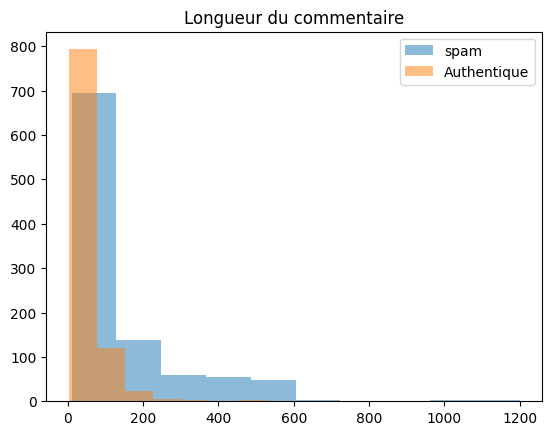

In [ ]:
# Visualisation

import matplotlib.pyplot as plt
plt.hist(df[df['CLASS']==1]['CONTENT_LENGTH'], alpha=0.5, label='spam')

plt.hist(df[df['CLASS']==0]['CONTENT_LENGTH'], alpha=0.5, label='Authentique')

plt.legend( loc='upper right')

plt.title('Longueur du commentaire')
plt.show()


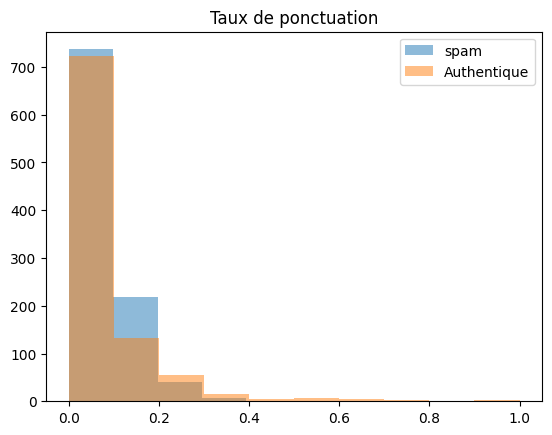

In [ ]:
plt.hist(df[df['CLASS']==1]['PUNCTUATION_RATE'], alpha=0.5, label='spam')

plt.hist(df[df['CLASS']==0]['PUNCTUATION_RATE'], alpha=0.5, label='Authentique')

plt.legend( loc='upper right')

plt.title('Taux de ponctuation')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
speed=123

x_train1,x_test1,y_train1,y_test1=train_test_split(

    df[['CONTENT','CONTENT_LENGTH','PUNCTUATION_RATE']],df['CLASS'],test_size=0.2, random_state=seed


    )




In [ ]:
x_train1.shape

(1564, 3)

In [ ]:
y_train1.shape

(1564,)

In [ ]:
x_train1.head()

,CONTENT,CONTENT_LENGTH,PUNCTUATION_RATE
38,Love this song! My soccer team made a cd for o...,77,0.032787
72,Sub my channel!﻿,16,0.071429
356,I WILL NEVER FORGET THIS SONG IN MY LIFE LIKE ...,105,0.058824
126,Love the way you lie - Driveshaft﻿,34,0.035714
340,*****PLEASE READ***** Hey everyone! I&#39;m a...,351,0.109929


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

x_train_vec1= vectorizer.fit_transform(x_train1['CONTENT'])

x_test_vec1= vectorizer.transform(x_test1['CONTENT'])

In [ ]:
x_train_vec1

<1564x3846 sparse matrix of type '<class 'numpy.int64'>'
	with 20361 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '002', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

In [ ]:
len(vectorizer.get_feature_names_out())

3846

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=seed)
rf_fitted=rf.fit(x_train_vec1,y_train1)


In [ ]:
rf_fitted.score(x_test_vec1,y_test1)

0.9617346938775511

In [ ]:
# Transformer x_train vec en dataframe
x_train_content=pd.DataFrame(
    x_train_vec1.toarray(),
    columns=vectorizer.get_feature_names_out()

)
x_train_content

,00,000,002,018,034,04,047000,05,053012,0687119038,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train_final=pd.concat( [
    x_train1[['CONTENT_LENGTH','PUNCTUATION_RATE']].reset_index(drop=True),
    x_train_content
],axis=1
)
x_train_final.head()

,CONTENT_LENGTH,PUNCTUATION_RATE,00,000,002,018,034,04,047000,05,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,77,0.032787,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0.071429,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,105,0.058824,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34,0.035714,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,351,0.109929,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=seed)
rf_fitted=rf.fit(x_train_final,y_train1)

In [ ]:
# Transformer x_train vec en dataframe
x_test_content=pd.DataFrame(
    x_test_vec1.toarray(),
    columns=vectorizer.get_feature_names_out()

)
x_test_final=pd.concat( [
    x_test1[['CONTENT_LENGTH','PUNCTUATION_RATE']].reset_index(drop=True),
    x_test_content
],axis=1
)
x_test_final.head()

,CONTENT_LENGTH,PUNCTUATION_RATE,00,000,002,018,034,04,047000,05,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,29,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0.010309,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36,0.071429,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,233,0.078534,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,58,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
rf_fitted.score(x_test_final,y_test1)

0.9591836734693877

In [ ]:
new_comment1='join me to have fun on xx money'

In [ ]:
new_data1=pd.concat([
    pd.DataFrame({'CONTENT_LENGTH': len([len(new_comment1)]), 'PUNCTUATION_RATE': [count_punctuation(new_comment1)] }),
    pd.DataFrame(vectorizer.transform([new_comment1]).toarray(),columns=vectorizer.get_feature_names_out())

]
                    , axis=1

                    )

new_data1

,CONTENT_LENGTH,PUNCTUATION_RATE,00,000,002,018,034,04,047000,05,...,ｃｏｍｍｅｎｔ,ｄａｍｎ,ｅｂａｙ,ｆａｎｃy,ｈｔｔｐ,ｉｓ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｕｓｒ,ｗｗｗ
0,1,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
rf_fitted.predict(new_data1)

array([1])